# Illustrate retrospective cohort
We create four figures (two for main text and two for extended data) to illustrate comparisons between Molecular Oncology Almanac and PHIAL-TARGET on four cohorts: metastatic melanoma, metastatic castration-resistant prostate cancer, primary kidney cancer, and pediatric cancers. 

## Observed clinically relevant molecular features 
The first first generated is an overall description of the specific and types of observed molecular features. Panel a shows the number of patients with at least one molecular feature labeled as putatively actionable or investigate actionability by both PHIAL-TARGET and MOAlmanac, just MOAlmanac, or neither. 

Panel b similarly shows molecular feature types not considered by PHIAL-TARGET. Panel c shows the most common genes altered by feature type for somatic variants and copy number alterations shown and panel d likewise does the same for the additional feature types.

## The number of patients with a clinically relevant molecular features
While the prior figure showed a breakdown of feature types, this figure illustrates the breakdown by number of patients. Panel a shows circle plots for the number of patients per cohort that have a clinically relevant molecular feature by PHIAL-TARGET, then MOAlmanac (with just somatic variants or copy number alterations), and lastly MOAlmanac considering all feature types. Panel b investigates _only_ associations with therapeutic sensitivity, showing that including extended evidence types provides patients with therapeutic hypothesis whom otherwise would not have one. 

## Counts per feature type
Here, we simply plot the number of clinically relevant molecular features by feature type as evaluated by PHIAL-TARGET and MOAlmanac.

## Counts of associations by feature type, clinical relevance, cohort, evidence, and assertion type.
This last extended data figure is a lot. Here, we breakdown the number of associations observed across the dimensions of feature type, clinical relevance, cohort, evidence, and assertion type. Cohorts are aligned on the vertical and there are three sets of two rows; one set per assertion type each containing a row for putatively actionable associations and a second for investigate actionability associations. Each element in the figure is a bar chart that counts the number of associations in a stacked bar plot of counts per feature type by evidence.  

In [1]:
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import pandas as pd

import sys
sys.path.append('../../common/')
import settings
settings.set_arial_as_font()

from settings import Colors
tableau10 = Colors.tableau10
comut_colors = Colors.comut_figure
grey = Colors.grey
greengradient = Colors.greengradient

redact_germline = True

%matplotlib inline

## Load data

In [2]:
df = pd.read_csv('retrospective.actionability.txt', sep='\t')
df.head()

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
0,KIRP-2K-A9WE,ASXL1.Amplification,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,ASXL1 Amp
1,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
2,KIRP-2K-A9WE,COSMIC Signature 12,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Mutational signature,COSMIC Signature 12
3,KIRP-2K-A9WE,COSMIC Signature 4,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 4
4,KIRP-2K-A9WE,TPX2.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,NaN,Preclinical,NaN,Somatic copy number,TPX2 Amp


In [3]:
vanallen_sorted = pd.read_csv('retrospective.pivoted.vanallen.txt', sep='\t', index_col='feature_type')
vanallen_sorted.fillna(0, inplace=True)

In [4]:
robinson_sorted = pd.read_csv('retrospective.pivoted.robinson.txt', sep='\t', index_col='feature_type')
robinson_sorted.fillna(0, inplace=True)

In [5]:
perry_sorted = pd.read_csv('retrospective.pivoted.perry.txt', sep='\t', index_col='feature_type')
perry_sorted.fillna(0, inplace=True)

In [6]:
tcga_sorted = pd.read_csv('retrospective.pivoted.tcga.txt', sep='\t', index_col='feature_type')
tcga_sorted.fillna(0, inplace=True)

In [7]:
vanallen_counts_sens = pd.read_csv('retrospective.sensitivity-by-evidence.vanallen.txt', sep='\t')
vanallen_counts_sens

,evidence,counts,fraction,label
0,FDA-Approved,70,0.64,FDA
1,Guideline,9,0.08,Guideline
2,Clinical trial,1,0.01,Clinical trial
3,Clinical evidence,16,0.15,Clinical evidence
4,Preclinical,10,0.09,Preclinical
5,Inferential,1,0.01,Inferential
6,WT,3,0.03,No event associated with therapeutic sensitivity


In [8]:
robinson_counts_sens = pd.read_csv('retrospective.sensitivity-by-evidence.robinson.txt', sep='\t')
robinson_counts_sens

,evidence,counts,fraction,label
0,FDA-Approved,29.0,0.19,FDA
1,Guideline,78.0,0.52,Guideline
2,Clinical trial,4.0,0.03,Clinical trial
3,Clinical evidence,0.0,0.00,Clinical evidence
4,Preclinical,29.0,0.19,Preclinical
5,Inferential,1.0,0.01,Inferential
6,WT,9.0,0.06,No event associated with therapeutic sensitivity


In [9]:
perry_counts_sens = pd.read_csv('retrospective.sensitivity-by-evidence.perry.txt', sep='\t')
perry_counts_sens

,evidence,counts,fraction,label
0,FDA-Approved,5,0.09,FDA
1,Guideline,4,0.07,Guideline
2,Clinical trial,2,0.03,Clinical trial
3,Clinical evidence,1,0.02,Clinical evidence
4,Preclinical,17,0.28,Preclinical
5,Inferential,9,0.16,Inferential
6,WT,20,0.34,No event associated with therapeutic sensitivity


In [10]:
tcga_counts_sens = pd.read_csv('retrospective.sensitivity-by-evidence.tcga.txt', sep='\t')
tcga_counts_sens

,evidence,counts,fraction,label
0,FDA-Approved,16,0.16,FDA
1,Guideline,20,0.20,Guideline
2,Clinical trial,4,0.04,Clinical trial
3,Clinical evidence,9,0.09,Clinical evidence
4,Preclinical,16,0.16,Preclinical
5,Inferential,18,0.18,Inferential
6,WT,16,0.17,No event associated with therapeutic sensitivity


In [11]:
vanallen_feature_type_counts = pd.read_csv('retrospective.feature-type-counts.vanallen.txt', sep='\t', index_col='method')
vanallen_feature_type_counts

,Somatic variant,Somatic copy number,Rearrangement,Germline variant,Tumor mutational burden,Mutational signature,Aneuploidy
method,,,,,,,
PHIAL/TARGET,167.0,127.0,0.0,0.0,0.0,0.0,0.0
Molecular Oncology Almanac,601.0,137.0,19.0,0.0,44.0,5.0,62.0


In [12]:
robinson_feature_type_counts = pd.read_csv('retrospective.feature-type-counts.robinson.txt', sep='\t', index_col='method')
robinson_feature_type_counts

,Somatic variant,Somatic copy number,Rearrangement,Germline variant,Tumor mutational burden,Mutational signature,Aneuploidy
method,,,,,,,
PHIAL/TARGET,108.0,218.0,0.0,0.0,0.0,0.0,0.0
Molecular Oncology Almanac,235.0,227.0,108.0,0.0,4.0,35.0,75.0


In [13]:
perry_feature_type_counts = pd.read_csv('retrospective.feature-type-counts.perry.txt', sep='\t', index_col='method')
perry_feature_type_counts

,Somatic variant,Somatic copy number,Rearrangement,Germline variant,Tumor mutational burden,Mutational signature,Aneuploidy
method,,,,,,,
PHIAL/TARGET,16.0,61.0,0.0,0.0,0.0,0.0,0.0
Molecular Oncology Almanac,27.0,59.0,6.0,0.0,0.0,21.0,33.0


In [14]:
tcga_feature_type_counts = pd.read_csv('retrospective.feature-type-counts.tcga.txt', sep='\t', index_col='method')
tcga_feature_type_counts

,Somatic variant,Somatic copy number,Rearrangement,Germline variant,Tumor mutational burden,Mutational signature,Aneuploidy
method,,,,,,,
PHIAL/TARGET,19.0,22.0,0.0,0.0,0.0,0.0,0.0
Molecular Oncology Almanac,72.0,87.0,4.0,0.0,0.0,57.0,10.0


## Figure 2

In [15]:
def format_bar(ax):
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)
    
    plt.tick_params(axis = 'both', which = 'both',
                top = False, bottom = False, right = False, left = False, 
                labeltop = False, labelbottom = True, labelright = False, labelleft = True)
    
    plt.xticks(fontsize=7, rotation=45, ha='right')
    plt.yticks(fontsize=7)

def format_figure(ax, ylabels_boolean, label):
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_linewidth(0.75)
        ax.spines[spine].set_linestyle('--')
        
    plt.tick_params(axis='both', which='both',
                   top=False, bottom=False, right=False, left=False,
                   labeltop=False, labelbottom=False, labelright=False, labelleft=ylabels_boolean)
    
    if ylabels_boolean:
        plt.yticks([0, 1.5, 1], fontsize=9)
        ax.set_yticklabels([label], fontsize=7, minor=False)

def plot_bar(values, x_pos, y_pos, ymax, ylabel=''):
    ax = plt.subplot(gs[x_pos, y_pos])
    format_bar(ax)
    
    values.plot.bar(color=tableau10['blue'], width=0.9)
    plt.xticks(fontsize=5, rotation=45, ha='right')
    plt.yticks(fontsize=5)
    plt.ylim([0, 85])
    if ylabel != '':
        plt.ylabel(ylabel, fontsize=7)
        
def plot_comut(dataframe, grid, column, cmap, norm, ylabels=False, row_plus=0):
    for dtype_label in dataframe.index:
        dtype_idx = dataframe.index.get_loc(dtype_label)
        ax = plt.subplot(grid[dtype_idx + row_plus, column])
        format_figure(ax, ylabels, dtype_label)
        
        array = dataframe.loc[dtype_label, :].astype(int).values
        expanded = np.expand_dims(array, axis=0)
        plt.imshow(expanded, aspect='auto', interpolation='nearest', cmap=cmap, norm=norm)

def remove_spines(ax):
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

def remove_ticks():
    plt.tick_params(axis = 'both', which = 'both',
                top = False, bottom = False, right = False, left = False, 
                labeltop = False, labelbottom = False, labelright = False, labelleft = False)

In [16]:
display_v = 7
display_r = 8
display_k = 5
display_o = 4

idx_v = df['cohort'].eq('MEL')
idx_r = df['cohort'].eq('SU2C')
idx_k = df['cohort'].eq('KIRP')
idx_o = df['cohort'].eq('OS')

idx_almanac = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_phial = df['phial_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_both = idx_almanac & idx_phial

idx_std = df['feature_type'].isin(['Somatic variant', 'Somatic copy number'])
idx_nstd = ~idx_std

v_std_almanac = df[idx_v & idx_std & idx_almanac]['feature_str_simple'].value_counts().head(display_v)
v_std_both = df[idx_v & idx_std & idx_both]['feature_str_simple'].value_counts().reindex(v_std_almanac.index).fillna(0)
v_std_almanac_only = v_std_almanac.subtract(v_std_both)
v_nstd = df[idx_v & idx_nstd & idx_almanac]['feature_str_simple'].value_counts().head(display_v)

r_std_almanac = df[idx_r & idx_std & idx_almanac]['feature_str_simple'].value_counts().head(display_r)
r_std_both = df[idx_r & idx_std & idx_both]['feature_str_simple'].value_counts().reindex(r_std_almanac.index).fillna(0)
r_std_almanac_only = r_std_almanac.subtract(r_std_both)
r_nstd = df[idx_r & idx_nstd & idx_almanac]['feature_str_simple'].value_counts().head(display_r)

k_std_almanac = df[idx_k & idx_std & idx_almanac]['feature_str_simple'].value_counts().head(display_k)
k_std_both = df[idx_k & idx_std & idx_both]['feature_str_simple'].value_counts().reindex(k_std_almanac.index).fillna(0)
k_std_almanac_only = k_std_almanac.subtract(k_std_both)
k_nstd = df[idx_k & idx_nstd & idx_almanac]['feature_str_simple'].value_counts().head(display_k)

o_std_almanac = df[idx_o & idx_std & idx_almanac]['feature_str_simple'].value_counts().head(display_o)
o_std_both = df[idx_o & idx_std & idx_both]['feature_str_simple'].value_counts().reindex(o_std_almanac.index).fillna(0)
o_std_almanac_only = o_std_almanac.subtract(o_std_both)
o_nstd = df[idx_o & idx_nstd & idx_almanac]['feature_str_simple'].value_counts().head(display_o)

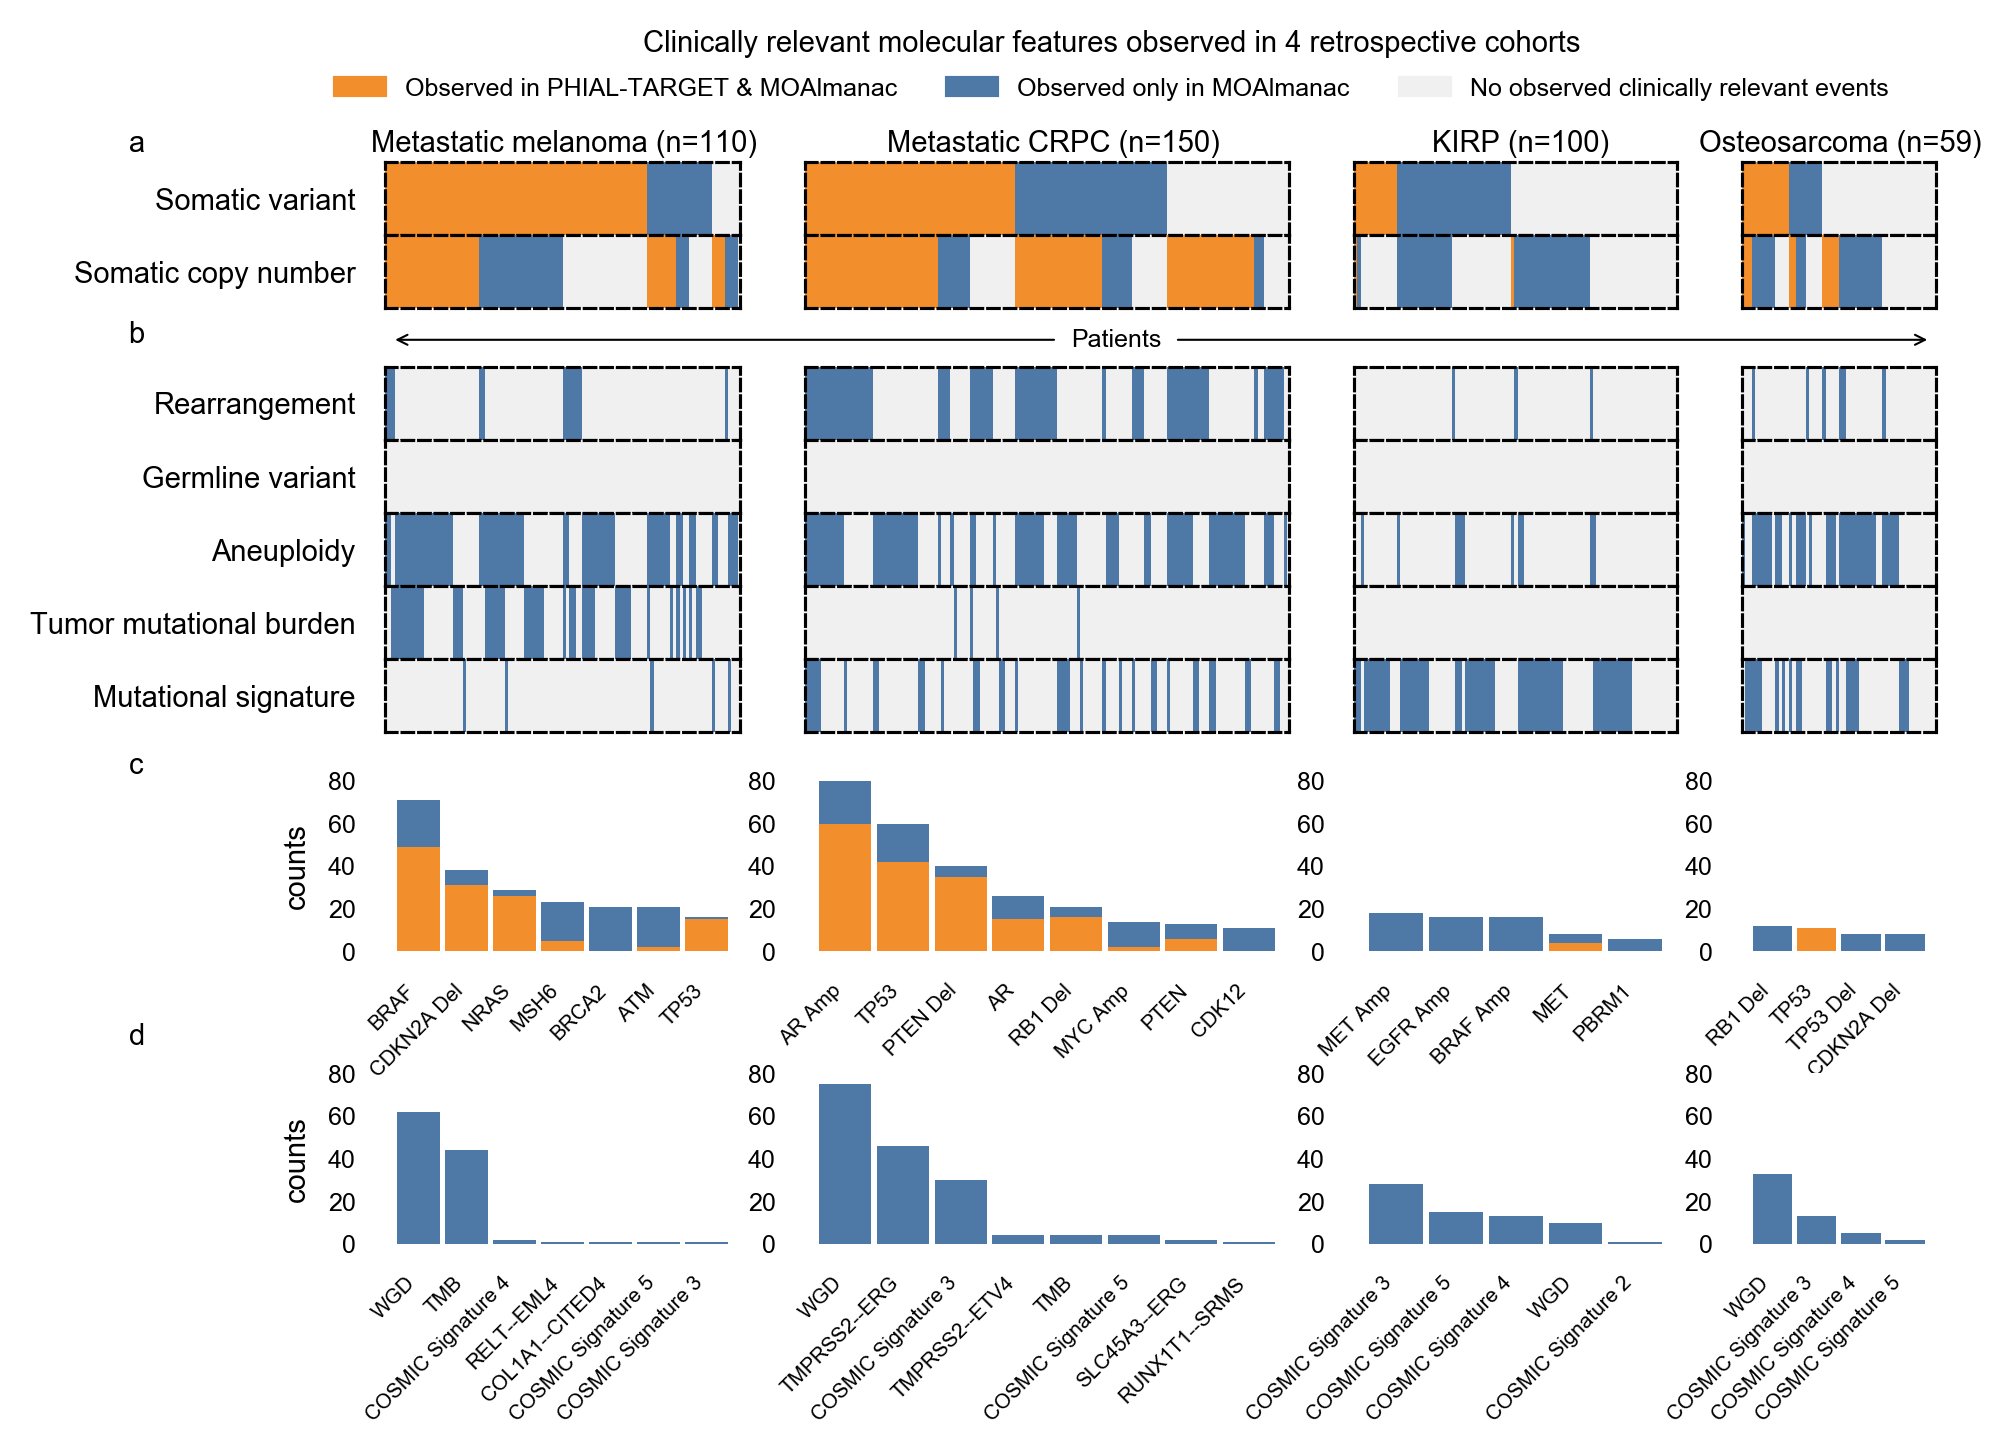

In [17]:
font_size = 6
font_size_sm = 5
font_size_lg = 7

COLUMN_MELANOMA = 1
COLUMN_PROSTATE = 3
COLUMN_KIDNEY = 5
COLUMN_OS = 7

cm = 1/2.54
fig = plt.figure(figsize=(18*cm, 13.5*cm), dpi=300)

width_ratios = [3, 11, 2, 15, 2, 10, 2, 6]
height_ratios = [1, 2, 2,
                3, 3,
                0.2, 2, 0.2,
                3, 3, 3, 3, 3,
                2,  
                7, 5, 7]
gs = gridspec.GridSpec(17, 8, width_ratios = width_ratios, height_ratios = height_ratios, hspace=0, wspace=0)

# Row 0, title
ax_title = plt.subplot(gs[0, :])
plt.xlim([0, 1])

title = 'Clinically relevant molecular features observed in 4 retrospective cohorts'
ax_title.annotate(title, (0, 0.85), (0.50, 0.85), ha='center', va='center', size=font_size_lg)

remove_spines(ax_title)
remove_ticks()

# Row 1, legend
labels = ['Observed in PHIAL-TARGET & MOAlmanac',
          'Observed only in MOAlmanac',
          'No observed clinically relevant events']
legend_colors = [Colors.tableau10['orange'], 
                 Colors.tableau10['blue'], 
                 Colors.tableau10['white']]
ax_legend_main = plt.subplot(gs[1, :])
patches = [mpatches.Patch(color=color, label=label) 
           for label, color in zip(labels, legend_colors)]
plt.legend(patches, labels, loc='center', frameon=False, fontsize=font_size, ncol=3)

remove_spines(ax_legend_main)
remove_ticks()

# Row 2, space

# Row 3, somatic variants
COHORT_LABEL_Y = 0.815
cmap = colors.ListedColormap(comut_colors)
bounds = [0, 1, 2, 3]
norm = colors.BoundaryNorm(bounds, cmap.N)

first_rows = ['Somatic variant', 'Somatic copy number']
second_rows = ['Rearrangement', 'Germline variant', 'Aneuploidy', 'Tumor mutational burden', 'Mutational signature']
plot_comut(vanallen_sorted.loc[first_rows, :], gs, COLUMN_MELANOMA, cmap, norm, ylabels=True, row_plus=3)
plot_comut(vanallen_sorted.loc[second_rows, :], gs, COLUMN_MELANOMA, cmap, norm, ylabels=True, row_plus=8)
plt.figtext(0.255, COHORT_LABEL_Y, 'Metastatic melanoma (n=110)', va="center", ha="center", fontsize=font_size_lg)

plot_comut(robinson_sorted.loc[first_rows, :], gs, COLUMN_PROSTATE, cmap, norm, ylabels=False, row_plus=3)
plot_comut(robinson_sorted.loc[second_rows, :], gs, COLUMN_PROSTATE, cmap, norm, ylabels=False, row_plus=8)
plt.figtext(0.485, COHORT_LABEL_Y, 'Metastatic CRPC (n=150)', va="center", ha="center", fontsize=font_size_lg)

plot_comut(tcga_sorted.loc[first_rows, :], gs, COLUMN_KIDNEY, cmap, norm, ylabels=False, row_plus=3)
plot_comut(tcga_sorted.loc[second_rows, :], gs, COLUMN_KIDNEY, cmap, norm, ylabels=False, row_plus=8)
plt.figtext(0.705, COHORT_LABEL_Y, 'KIRP (n=100)', va="center", ha="center", fontsize=font_size_lg)

plot_comut(perry_sorted.loc[first_rows, :], gs, COLUMN_OS, cmap, norm, ylabels=False, row_plus=3)
plot_comut(perry_sorted.loc[second_rows, :], gs, COLUMN_OS, cmap, norm, ylabels=False, row_plus=8)
plt.figtext(0.855, COHORT_LABEL_Y, 'Osteosarcoma (n=59)', va="center", ha="center", fontsize=font_size_lg)

# Row 5, patient label
ax_x_label = plt.subplot(gs[6, :])
plt.xlim([0, 1])

ax_x_label.annotate('', (0.06, 0.45), (0.47, 0.45), ha='right', va='center', size=6,
                   arrowprops=dict(arrowstyle='->', fc='k', ec='k', linewidth=0.50))
ax_x_label.annotate('Patients', (1, 0.45), (0.53, 0.45), ha='right', va='center', size=6,
                   arrowprops=dict(arrowstyle='->', fc='k', ec='k', linewidth=0.50))

remove_spines(ax_x_label)
remove_ticks()

# Row 13, first-order specific events
Y_FIRST = 14
y_ticks = [0, 20, 40, 60, 80]
fig_label_y = 0.65

## melanoma
ax_m_feature_1 = plt.subplot(gs[Y_FIRST, COLUMN_MELANOMA])
format_bar(ax_m_feature_1)
p1 = v_std_both.plot.bar(color=tableau10['orange'], width=0.9)
p2 = v_std_almanac_only.plot.bar(color=tableau10['blue'], width=0.9, bottom=v_std_both)

plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(y_ticks, fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size_lg)

## prostate
ax_r_feature_1 = plt.subplot(gs[Y_FIRST, COLUMN_PROSTATE])
format_bar(ax_r_feature_1)
p1 = r_std_both.plot.bar(color=tableau10['orange'], width=0.9)
p2 = r_std_almanac_only.plot.bar(color=tableau10['blue'], width=0.9, bottom=r_std_both)

plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(y_ticks, fontsize=font_size)
plt.ylim([0, 80])

## kidney
ax_k_feature_1 = plt.subplot(gs[Y_FIRST, COLUMN_KIDNEY])
format_bar(ax_k_feature_1)
p1 = k_std_both.plot.bar(color=tableau10['orange'], width=0.9)
p2 = k_std_almanac_only.plot.bar(color=tableau10['blue'], width=0.9, bottom=k_std_both)

plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(y_ticks, fontsize=font_size)
plt.ylim([0, 80])

## osteosarcoma
ax_o_feature_1 = plt.subplot(gs[Y_FIRST, COLUMN_OS])
format_bar(ax_o_feature_1)
p1 = o_std_both.plot.bar(color=tableau10['orange'], width=0.9)
p2 = o_std_almanac_only.plot.bar(color=tableau10['blue'], width=0.9, bottom=o_std_both)

plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(y_ticks, fontsize=font_size)
plt.ylim([0, 80])

# Row 12, space

# Row 13, second-order specific events
Y_SECOND = 16

## melanoma
ax_m_feature_2 = plt.subplot(gs[Y_SECOND, COLUMN_MELANOMA])
format_bar(ax_m_feature_2)

p3 = v_nstd.plot.bar(color=tableau10['blue'], width=0.9)
plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(y_ticks, fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size_lg)

## prostate
ax_r_feature_2 = plt.subplot(gs[Y_SECOND, COLUMN_PROSTATE])
format_bar(ax_r_feature_2)

p3 = r_nstd.plot.bar(color=tableau10['blue'], width=0.9)
plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(y_ticks, fontsize=font_size)
plt.ylim([0, 80])

## kidney
ax_k_feature_2 = plt.subplot(gs[Y_SECOND, COLUMN_KIDNEY])
format_bar(ax_k_feature_2)

p3 = k_nstd.plot.bar(color=tableau10['blue'], width=0.9)
plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(y_ticks, fontsize=font_size)
plt.ylim([0, 80])

## osteosarcoma
ax_o_feature_2 = plt.subplot(gs[Y_SECOND, COLUMN_OS])
format_bar(ax_o_feature_2)

p3 = o_nstd.plot.bar(color=tableau10['blue'], width=0.9)
plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(y_ticks, fontsize=font_size)
plt.ylim([0, 80])

# Plot label subfigures
fig_label_x = 0.05
fig_label_y_a = 0.81
fig_label_y_b = 0.69
fig_label_y_c = 0.42
fig_label_y_d = 0.25

plt.figtext(fig_label_x, fig_label_y_a, 'a', fontsize=font_size_lg)
plt.figtext(fig_label_x, fig_label_y_b, 'b', fontsize=font_size_lg)
plt.figtext(fig_label_x, fig_label_y_c, 'c', fontsize=font_size_lg)
plt.figtext(fig_label_x, fig_label_y_d, 'd', fontsize=font_size_lg)

filename = 'fig-2'
folder = f'../../figures/fig-2'
!mkdir -p $folder
for suffix in ['eps', 'pdf', 'png', 'svg']:
    outname = f'{folder}/{filename}.{suffix}'
    plt.savefig(outname, format=suffix, bbox_inches='tight', dpi=300)

plt.show()

In [18]:
writer = pd.ExcelWriter(f'{folder}/source-data-{filename}.xlsx', engine='xlsxwriter')

## Figure 2 a & b
def prepare_sorted_data_for_concat(dataframe):
    return dataframe.T.reset_index().rename(columns={'index': 'sample_name'})

vanallen_sorted_data = prepare_sorted_data_for_concat(vanallen_sorted)
vanallen_sorted_data['cohort'] = 'metastatic melanoma'

robinson_sorted_data = prepare_sorted_data_for_concat(robinson_sorted)
robinson_sorted_data['cohort'] = 'mCRPC'

kirp_sorted_data = prepare_sorted_data_for_concat(tcga_sorted)
kirp_sorted_data['cohort'] = 'KIRP'

perry_sorted_data = prepare_sorted_data_for_concat(perry_sorted)
perry_sorted_data['cohort'] = 'OS'

(pd
 .concat([vanallen_sorted_data, robinson_sorted_data, kirp_sorted_data, perry_sorted_data])
 .to_excel(writer, index=False, sheet_name='Fig. 2a,b')
)

## Figure 2 c & d
(df
 .loc[idx_almanac, :]
 .drop('sum', axis=1)
 .to_excel(writer, index=False, sheet_name='Fig. 2c,d')
)

writer.save()

## Figure 4

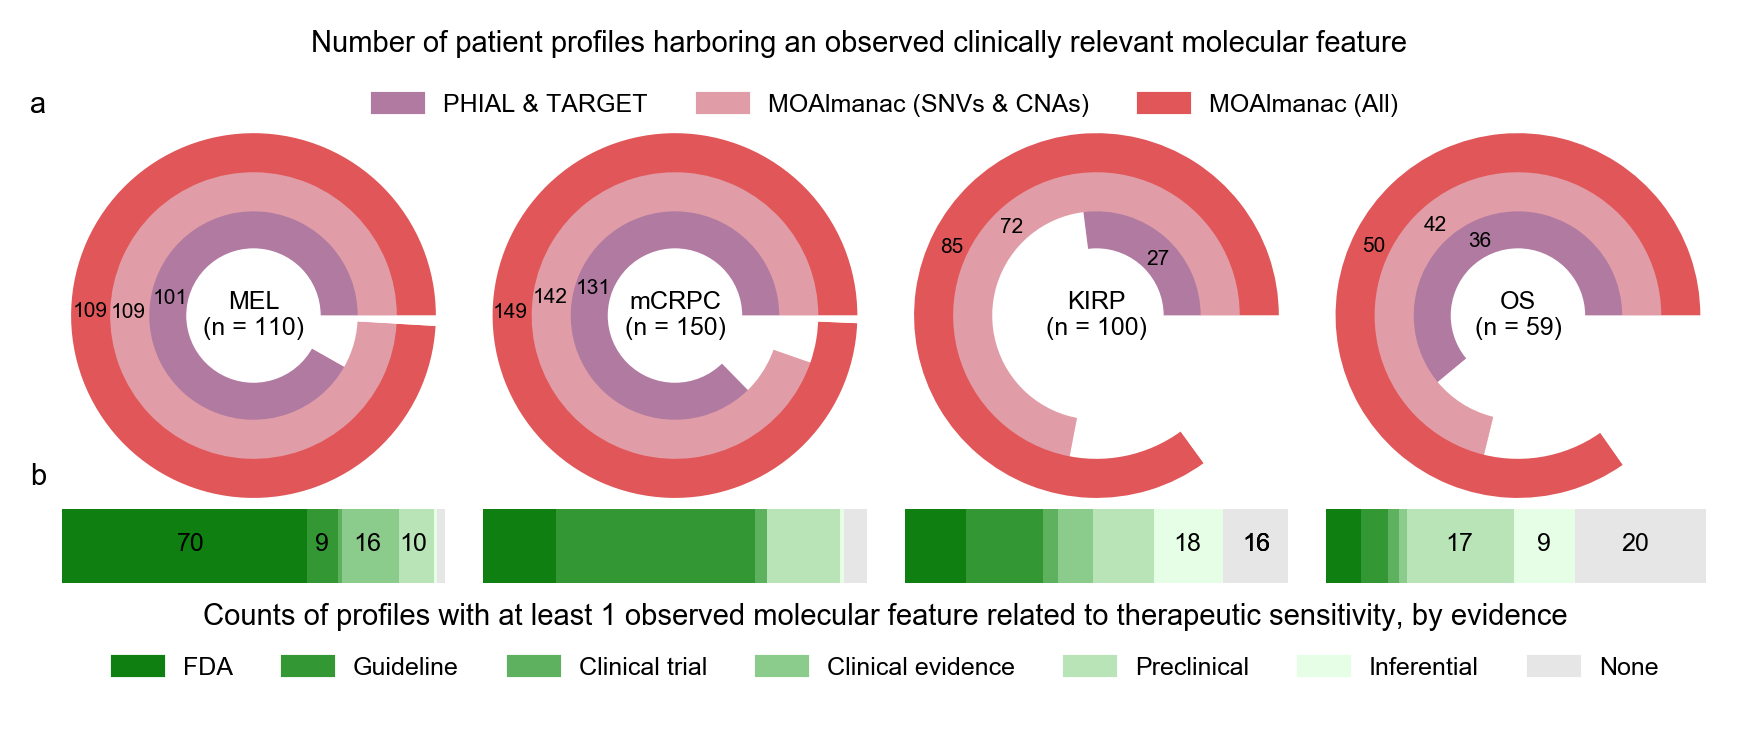

In [19]:
cm = 1/2.54
fig = plt.figure(figsize=(18*cm, 7*cm), dpi=300)

#width_ratios = [11, 15, 10, 6]
width_ratios = [1, 0.1, 1, 0.1, 1, 0.1, 1]
height_ratios = [1, 2, 3, 
                 2, 
                 1.5, 1, 1]
gs = gridspec.GridSpec(7, 7, width_ratios = width_ratios, height_ratios = height_ratios, hspace=0, wspace=0)

# Top, circle plots
df = pd.read_csv('retrospective.actionability.txt', sep='\t')

idx_ftype = df['feature_type'].isin(['Somatic variant', 'Somatic copy number'])
idx_almanac = df['almanac_bin'].isin(['Putatively Actionable', 'Investigate Actionability'])
idx_phial = df['phial_bin'].isin(['Putatively Actionable', 'Investigate Actionability'])

def create_circle_plot(gs_row, gs_column, n_total, n_group1, n_group2, n_group3, label,
                      group1_pos=0.76, group2_pos=0.81, group3_pos=0.85):
    ax = plt.subplot(gs[gs_row, gs_column])
    group_1 = [n_group1, n_total - n_group1]
    group_2 = [n_group2, n_total - n_group2]
    group_3 = [n_group3, n_total - n_group3]
    plt.pie(group_3, radius=2.8, 
            colors=[tableau10['red'], 'white'], labels=[f'{n_group3}', ''], 
            labeldistance=group3_pos, textprops={'fontsize': 5})
    plt.pie(group_2, radius=2.2, 
            colors=[tableau10['pink'], 'white'], labels=[f'{n_group2}', ''], 
            labeldistance=group2_pos, textprops={'fontsize': 5})
    plt.pie(group_1, radius=1.6, 
            colors=[tableau10['purple'], 'white'], labels=[f'{n_group1}', ''], 
            labeldistance=group1_pos, textprops={'fontsize': 5})
    
    center_label = f'{label}\n(n = {n_total})'
    center_circle = plt.Circle( (0,0), 1, color='white')
    p = plt.gcf()
    p.gca().add_artist(center_circle)
    
    label = ax.annotate(center_label, xy=(0, 0), fontsize=6, ha='center', va='center')
    
    return p

def get_patient_counts(dataframe, idx):
    return dataframe[idx]['patient_id'].drop_duplicates().shape[0]

## Top circle plots, title
title = f'Number of patient profiles harboring an observed clinically relevant molecular feature'
plt.suptitle(title, y=0.93, fontsize = 7)

## Top circle plots, legend
labels = {
    'PHIAL & TARGET': tableau10['purple'],
    'MOAlmanac (SNVs & CNAs)': tableau10['pink'],
    'MOAlmanac (All)': tableau10['red']
}

ax_legend = plt.subplot(gs[0, :])
patches = [mpatches.Patch(color=color, label=label) for label, color in labels.items()]
legend = plt.legend(patches, list(labels.keys()), loc='upper center', frameon=False, fontsize=6, ncol=3)
remove_spines(ax_legend)
remove_ticks()

p_m = create_circle_plot(2, 0, 110, 
                         get_patient_counts(df, (idx_phial & df['cohort'].eq('MEL'))), 
                         get_patient_counts(df, (idx_almanac & idx_ftype & df['cohort'].eq('MEL'))),
                         get_patient_counts(df, (idx_almanac & df['cohort'].eq('MEL'))),
                         'MEL',
                         group1_pos=0.65, group2_pos=0.75, group3_pos=0.80)
p_p = create_circle_plot(2, 2, 150, 
                         get_patient_counts(df, (idx_phial & df['cohort'].eq('SU2C'))), 
                         get_patient_counts(df, (idx_almanac & idx_ftype & df['cohort'].eq('SU2C'))),
                         get_patient_counts(df, (idx_almanac & df['cohort'].eq('SU2C'))),
                         'mCRPC',
                         group1_pos=0.67, group2_pos=0.76, group3_pos=0.81)
p_k = create_circle_plot(2, 4, 100, 
                         get_patient_counts(df, (idx_phial & df['cohort'].eq('KIRP'))), 
                         get_patient_counts(df, (idx_almanac & idx_ftype & df['cohort'].eq('KIRP'))),
                         get_patient_counts(df, (idx_almanac & df['cohort'].eq('KIRP'))),
                         'KIRP',
                         group1_pos=0.72, group2_pos=0.80, group3_pos=0.82)
p_O = create_circle_plot(2, 6, 59, 
                         get_patient_counts(df, (idx_phial & df['cohort'].eq('OS'))), 
                         get_patient_counts(df, (idx_almanac & idx_ftype & df['cohort'].eq('OS'))),
                         get_patient_counts(df, (idx_almanac & df['cohort'].eq('OS'))),
                         'OS',
                         group1_pos=0.76, group2_pos=0.80, group3_pos=0.82)

# Bottom, sensitivity bars
evidence_labels = ['FDA', 'Guideline', 'Clinical trial', 'Clinical evidence', 
                   'Preclinical', 'Inferential', 
                   'None']

evidence_gradient = [
    greengradient[5], 
    greengradient[4], 
    greengradient[3], 
    greengradient[2],
    greengradient[1], 
    greengradient[0], 
    grey[3]
]

gradient_colors = {}
gradient_colors[0] = greengradient[5]
gradient_colors[1] = greengradient[4]
gradient_colors[2] = greengradient[3]
gradient_colors[3] = greengradient[2]
gradient_colors[4] = greengradient[1]
gradient_colors[5] = greengradient[0]
gradient_colors[6] = grey[3]

## Melanoma
ax_melanoma_sensitive = plt.subplot(gs[4, 0])

melanoma_fractions = {
    70: 0.30,
    9: 0.66, 
    16: 0.76,
    10: 0.88
}

total = 0
for index in vanallen_counts_sens.index:
    counts = vanallen_counts_sens.loc[index, 'counts']
    fraction = vanallen_counts_sens.loc[index, 'fraction']
    label = vanallen_counts_sens.loc[index, 'label']
    if fraction != 0.0:
        plt.barh(0.5, round(fraction, 2), color=gradient_colors[index], align='center', left=total, label=label)
        if fraction != 0.01 and counts > 5 and counts in list(melanoma_fractions.keys()):
            plt.text(melanoma_fractions[counts], 0.45, str(int(counts)), fontsize=6)
    total+=round(fraction, 2)

plt.xlim([0, 1])

remove_spines(ax_melanoma_sensitive)
remove_ticks()

## Prostate
ax_robinson_sensitive = plt.subplot(gs[4, 2])

robinson_fractions = {
    35: 0.08,
    74: 0.42, 
    28: 0.81,
    8: 0.955
}

total = 0
for index in robinson_counts_sens.index:
    counts = robinson_counts_sens.loc[index, 'counts']
    fraction = robinson_counts_sens.loc[index, 'fraction']
    label = robinson_counts_sens.loc[index, 'label']
    if fraction != 0.0:
        plt.barh(0.5, round(fraction, 2), color=gradient_colors[index], align='center', left=total, label=label)
        if fraction != 0.01 and counts > 5 and counts in list(robinson_fractions.keys()):
            plt.text(robinson_fractions[counts], 0.45, str(int(counts)), fontsize=6)
    total+=round(fraction, 2)

plt.xlim([0, 1])

remove_spines(ax_robinson_sensitive)
remove_ticks()

## Kidney
ax_tcga_sensitive = plt.subplot(gs[4, 4])

tcga_fractions = {
    17: 0.05,
    19: 0.22, 
    11: 0.42,
    14: 0.54,
    18: 0.70,
    16: 0.88
}

total = 0
for index in tcga_counts_sens.index:
    counts = tcga_counts_sens.loc[index, 'counts']
    fraction = tcga_counts_sens.loc[index, 'fraction']
    label = tcga_counts_sens.loc[index, 'label']
    if fraction != 0.0:
        plt.barh(0.5, round(fraction, 2), color=gradient_colors[index], align='center', left=total, label=label)
        if fraction != 0.01 and counts > 5 and counts in list(tcga_fractions.keys()):
            plt.text(tcga_fractions[counts], 0.45, str(int(counts)), fontsize=6)
    total+=round(fraction, 2)

plt.xlim([0, 1])

remove_spines(ax_tcga_sensitive)
remove_ticks()

## Osteosarcoma
ax_perry_sensitive = plt.subplot(gs[4, 6])

total = 0
for index in perry_counts_sens.index:
    counts = perry_counts_sens.loc[index, 'counts']
    fraction = perry_counts_sens.loc[index, 'fraction']
    label = perry_counts_sens.loc[index, 'label']
    if fraction != 0.0:
        plt.barh(0.5, round(fraction, 2), color=gradient_colors[index], align='center', left=total, label=label)
        if fraction != 0.01 and counts > 5:
            plt.text(round(total + 0.35*fraction, 2), 0.45, str(int(counts)), fontsize=6)
    total+=round(fraction, 2)

plt.xlim([0, 1])

remove_spines(ax_perry_sensitive)
remove_ticks()

## Title
ax_x_label = plt.subplot(gs[5, :])
plt.xlim([0, 1])

title = 'Counts of profiles with at least 1 observed molecular feature related to therapeutic sensitivity, by evidence'
ax_x_label.annotate(title, (0, 0.45), (0.50, 0.45), ha='center', va='center', size=7)

remove_spines(ax_x_label)
remove_ticks()

## Legend
ax_legend_main = plt.subplot(gs[6, :])
patches = [mpatches.Patch(color=color, label=label) 
           for label, color in zip(evidence_labels, evidence_gradient)]
plt.legend(patches, evidence_labels, loc='center', frameon=False, fontsize=font_size, ncol=7)

remove_spines(ax_legend_main)
remove_ticks()


# Add panels
fig_label_x = 0.11
fig_label_y_a = 0.83
fig_label_y_b = 0.38

plt.figtext(fig_label_x, fig_label_y_a, 'a', fontsize=7)
plt.figtext(fig_label_x, fig_label_y_b, 'b', fontsize=7)

# Show and save plot

filename = 'fig-4'
folder = f'../../figures/fig-4'
!mkdir -p $folder
for suffix in ['eps', 'pdf', 'png', 'svg']:
    outname = f'{folder}/{filename}.{suffix}'
    plt.savefig(outname, format=suffix, bbox_inches='tight', dpi=300)

plt.show()

In [20]:
writer = pd.ExcelWriter(f'{folder}/source-data-{filename}.xlsx', engine='xlsxwriter')

## Figure 4a
data = []
for cohort, n in [('MEL', 110), ('SU2C', 150), ('KIRP', 100), ('OS', 59)]:
    cohort_data = {
        'cohort': 'mCRPC' if cohort == 'SU2C' else cohort,
        'PHIAL & TARGET': get_patient_counts(df, (idx_phial & df['cohort'].eq(cohort))),
        'MOAlmanac (SNVs & CNAs)': get_patient_counts(df, (idx_almanac & idx_ftype & df['cohort'].eq(cohort))),
        'MOAlmanac (All)': get_patient_counts(df, (idx_almanac & df['cohort'].eq(cohort))),
        'total': n
    }
    data.append(cohort_data)
    
f3a = pd.DataFrame.from_records(data)
f3a.to_excel(writer, index=False, sheet_name='Fig. 4a')

## Figure 4b
def prepare_sens_counts_for_concat(dataframe, cohort):
    dataframe['cohort'] = cohort
    return dataframe

vanallen_counts_data = prepare_sens_counts_for_concat(vanallen_counts_sens, 'metastatic melanoma')
robinson_counts_data = prepare_sens_counts_for_concat(robinson_counts_sens, 'mCRPC')
tcga_counts_data = prepare_sens_counts_for_concat(tcga_counts_sens, 'KIRP')
perry_counts_data = prepare_sens_counts_for_concat(perry_counts_sens, 'OS')

(pd
 .concat([vanallen_counts_data, robinson_counts_data, tcga_counts_data, perry_counts_data])
 .to_excel(writer, index=False, sheet_name='Fig. 4b')
)

writer.save()

## Illustrate raw number of features obsered by Molecular Oncology Almanac versus PHIAL-TARGET per group

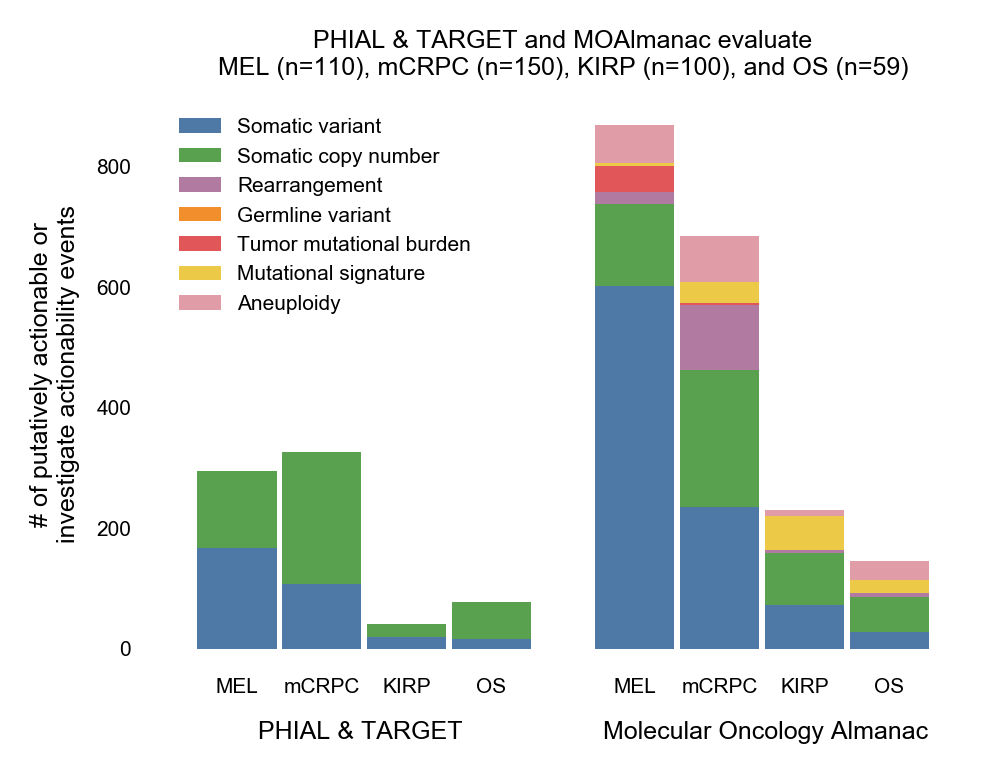

In [21]:
supp_data_kirp = tcga_feature_type_counts
supp_data_mel = vanallen_feature_type_counts
supp_data_mcrpc = robinson_feature_type_counts
supp_data_os = perry_feature_type_counts

cm = 1/2.54
fig = plt.figure(figsize=(8.8*cm, 6.16*cm), dpi=300)
#fig = plt.figure(figsize = (10, 6), constrained_layout=True)
ax = plt.subplot()

remove_spines(ax)
plt.tick_params(axis = 'both', which = 'both',
            top = False, bottom = False, right = False, left = False, 
            labeltop = False, labelbottom = True, labelright = False, labelleft = True)

dtype_color_map = {
    'Somatic variant': tableau10['blue'],
    'Somatic copy number': tableau10['green'],
    'Rearrangement': tableau10['purple'],
    'Germline variant': tableau10['orange'],
    'Tumor mutational burden': tableau10['red'],
    'Mutational signature': tableau10['yellow'],
    'Aneuploidy': tableau10['pink']
}

width = 0.3

mel_phial = 0
mel_almanac = 0
su2c_phial = 0
su2c_almanac = 0
kirp_phial = 0
kirp_almanac = 0
os_phial = 0
os_almanac = 0

for column in supp_data_mel.columns:
    value = supp_data_mel.loc['PHIAL/TARGET', column]
    plt.bar(0.52, value, width, color=dtype_color_map[column], align='center', bottom=mel_phial, label=column)
    mel_phial += value 
    
    value = supp_data_mcrpc.loc['PHIAL/TARGET', column]
    plt.bar(0.84, value, width, color=dtype_color_map[column], align='center', bottom=su2c_phial)
    su2c_phial += value 
    
    value = supp_data_kirp.loc['PHIAL/TARGET', column]
    plt.bar(1.16, value, width, color=dtype_color_map[column], align='center', bottom=kirp_phial)
    kirp_phial += value 
    
    value = supp_data_os.loc['PHIAL/TARGET', column]
    plt.bar(1.48, value, width, color=dtype_color_map[column], align='center', bottom=os_phial)
    os_phial += value 

    value = supp_data_mel.loc['Molecular Oncology Almanac', column]
    plt.bar(2.02, value, width, color=dtype_color_map[column], align='center', bottom=mel_almanac)
    mel_almanac += value 
    
    value = supp_data_mcrpc.loc['Molecular Oncology Almanac', column]
    plt.bar(2.34, value, width, color=dtype_color_map[column], align='center', bottom=su2c_almanac)
    su2c_almanac += value 
    
    value = supp_data_kirp.loc['Molecular Oncology Almanac', column]
    plt.bar(2.66, value, width, color=dtype_color_map[column], align='center', bottom=kirp_almanac)
    kirp_almanac += value 
    
    value = supp_data_os.loc['Molecular Oncology Almanac', column]
    plt.bar(2.98, value, width, color=dtype_color_map[column], align='center', bottom=os_almanac)
    os_almanac += value 
    
plt.ylabel('# of putatively actionable or\ninvestigate actionability events', fontsize = 6)

labels = ['MEL', 'mCRPC', 'KIRP', 'OS', 
          'MEL', 'mCRPC', 'KIRP', 'OS']
ax.set_xticks([0.52, 0.84, 1.16, 1.48, 
               2.02, 2.34, 2.66, 2.98])
ax.set_xticklabels(labels, fontsize = 5)
ax.tick_params(axis='y', which='major', labelsize=5)

title = 'PHIAL & TARGET and MOAlmanac evaluate\n\
MEL (n=110), mCRPC (n=150), KIRP (n=100), and OS (n=59)'

plt.title(title, fontsize = 6)
plt.legend(loc = 0, ncol = 1, frameon=False, fontsize=5)

plt.text(0.60, -150,'PHIAL & TARGET', fontsize = 6)
plt.text(1.90, -150,'Molecular Oncology Almanac', fontsize = 6)

filename = 'fig-3'
folder = f'../../figures/fig-3'
!mkdir -p $folder
for suffix in ['eps', 'pdf', 'png', 'svg']:
    outname = f'{folder}/{filename}.{suffix}'
    plt.savefig(outname, format=suffix, bbox_inches='tight', dpi=300)

plt.show()

In [22]:
def prepare_supp_data_for_concat(dataframe, cohort):
    df = dataframe.reset_index()
    df['cohort'] = cohort
    return df

supp_data_kirp = prepare_supp_data_for_concat(supp_data_kirp, 'KIRP')
supp_data_mel = prepare_supp_data_for_concat(supp_data_mel, 'metastatic melanoma')
supp_data_mcrpc = prepare_supp_data_for_concat(supp_data_mcrpc, 'mCRPC')
supp_data_os = prepare_supp_data_for_concat(supp_data_os, 'OS')

(pd
 .concat([supp_data_kirp, supp_data_mel, supp_data_mcrpc, supp_data_os])
 .to_excel(f'{folder}/source-data-{filename}.xlsx', index=False)
)

## Illustrate results by bin
We create a figure similar to that above, except that it will be an 4x2 gridpsec. Each row will feature a different tumor type. The left columns will feature putatively actionable counts while the rightside will have investigate actionability counts. Columns will be bar charts by data type, like above.

In [23]:
dataframe = pd.read_csv('retrospective.counts-by-category.txt', sep='\t')

feature_types = {
    'Somatic variant': tableau10['blue'],
    'Somatic copy number': tableau10['green'],
    'Rearrangement': tableau10['purple'],
    'Germline variant': tableau10['orange'],
    'Tumor mutational burden': tableau10['red'],
    'Mutational signature': tableau10['yellow'],
    'Aneuploidy': tableau10['pink']
}

x_pos = {
    'FDA-Approved': 1.0,
    'Guideline': 2.0,
    'Clinical trial': 3.0,
    'Clinical evidence': 4.0,
    'Preclinical': 5.0,
    'Inferential': 6.0
}

bottoms_zero = {
    'FDA-Approved': 0,
    'Guideline': 0,
    'Clinical trial': 0,
    'Clinical evidence': 0,
    'Preclinical': 0,
    'Inferential': 0
}

def plot_bar(gs_row, gs_column, df, cohort, actionability, ctype, bottoms):
    ax = plt.subplot(gs[gs_row, gs_column])
    ax.set_axisbelow(True)
    plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.5)
    
    tmp = df.loc[(df['cohort'].eq(cohort) & df['bin'].eq(actionability) & df['assertion'].eq(ctype)), :]
    
    for ftype, color in feature_types.items():
        iteration = 0
        for etype, bottom in bottoms.items():
            value = tmp.loc[tmp['feature_type'].eq(ftype) & tmp['evidence'].eq(etype), 'event counts'].tolist()[0]
            if iteration == 0:
                plt.bar(x_pos[etype], value, width, color=color, align='center', bottom=bottom, label=ftype)
            else:
                plt.bar(x_pos[etype], value, width, color=color, align='center', bottom=bottom)
            bottoms[etype] = bottom + value
            iteration += 1
    
    YMAX = {
        'MEL': {'sensitive': 200, 'resistance': 100, 'prognostic': 175},
        'SU2C': {'sensitive': 120, 'resistance': 100, 'prognostic': 100},
        'KIRP': {'sensitive': 70, 'resistance': 50, 'prognostic': 50},
        'OS': {'sensitive': 25, 'resistance': 25, 'prognostic': 50}
    }
    
    #plt.xlim([-5, 10])
    plt.ylim([0, YMAX[cohort][ctype]])
    
    ytick_marks = {
        'MEL': {'sensitive': [0, 25, 50, 75, 100, 125, 150, 175, 200], 
            'resistance': [0, 25, 50, 75, 100], 
            'prognostic': [0, 25, 50, 75, 100, 125, 150, 175]},
        'SU2C': {'sensitive': [0, 25, 50, 75, 100, 125], 
             'resistance': [0, 25, 50, 75, 100], 
             'prognostic': [0, 25, 50, 75, 100]},
        'KIRP': {'sensitive': [0, 20, 40, 60, 80], 
             'resistance': [0, 10, 20, 30, 40, 50], 
             'prognostic': [0, 10, 20, 30, 40, 50]},
        'OS': {'sensitive': [0, 5, 10, 15, 20, 25], 
           'resistance': [0, 5, 10, 15, 20, 25], 
           'prognostic': [0, 10, 20, 30, 40, 50]}
    }
    
    if gs_row in [2, 6, 10] and gs_column in [0, 2, 4, 6]:
        plt.title(cohort, fontsize=6, y=0.96)
    
    if gs_row in [2, 6, 10] and gs_column in [0]:
        plt.ylabel('Putatively Actionable', fontsize=6)
    if gs_row in [4, 8, 12] and gs_column in [0]:
        plt.ylabel('Investigate Actionablity', fontsize=6)
    #plt.ylabel(f'{cohort} counts', fontsize=6)
    ax.set_yticks(ytick_marks[cohort][ctype])
    #ax.set_yticklabels(ytick_marks[cohort][ctype])
    ax.tick_params(axis='y', which='major', labelsize=6)
    
    ax.set_xticks(list(x_pos.values()))
    if gs_row in [12]:
        ax.set_xticklabels(list(x_pos.keys()), rotation=45, ha='right')
        ax.tick_params(axis='x', which='major', labelsize=6)
    else:
        ax.set_xticklabels([])
    
    plt.tick_params(axis = 'both', which = 'both', bottom=False, left=False)
    
def plot_row(row, actionability, ctype):
    for column, cohort in [(0, 'MEL'), (2, 'SU2C'), (4, 'KIRP'), (6, 'OS')]:
        plot_bar(row, column, dataframe, cohort, actionability, ctype, bottoms_zero.copy())

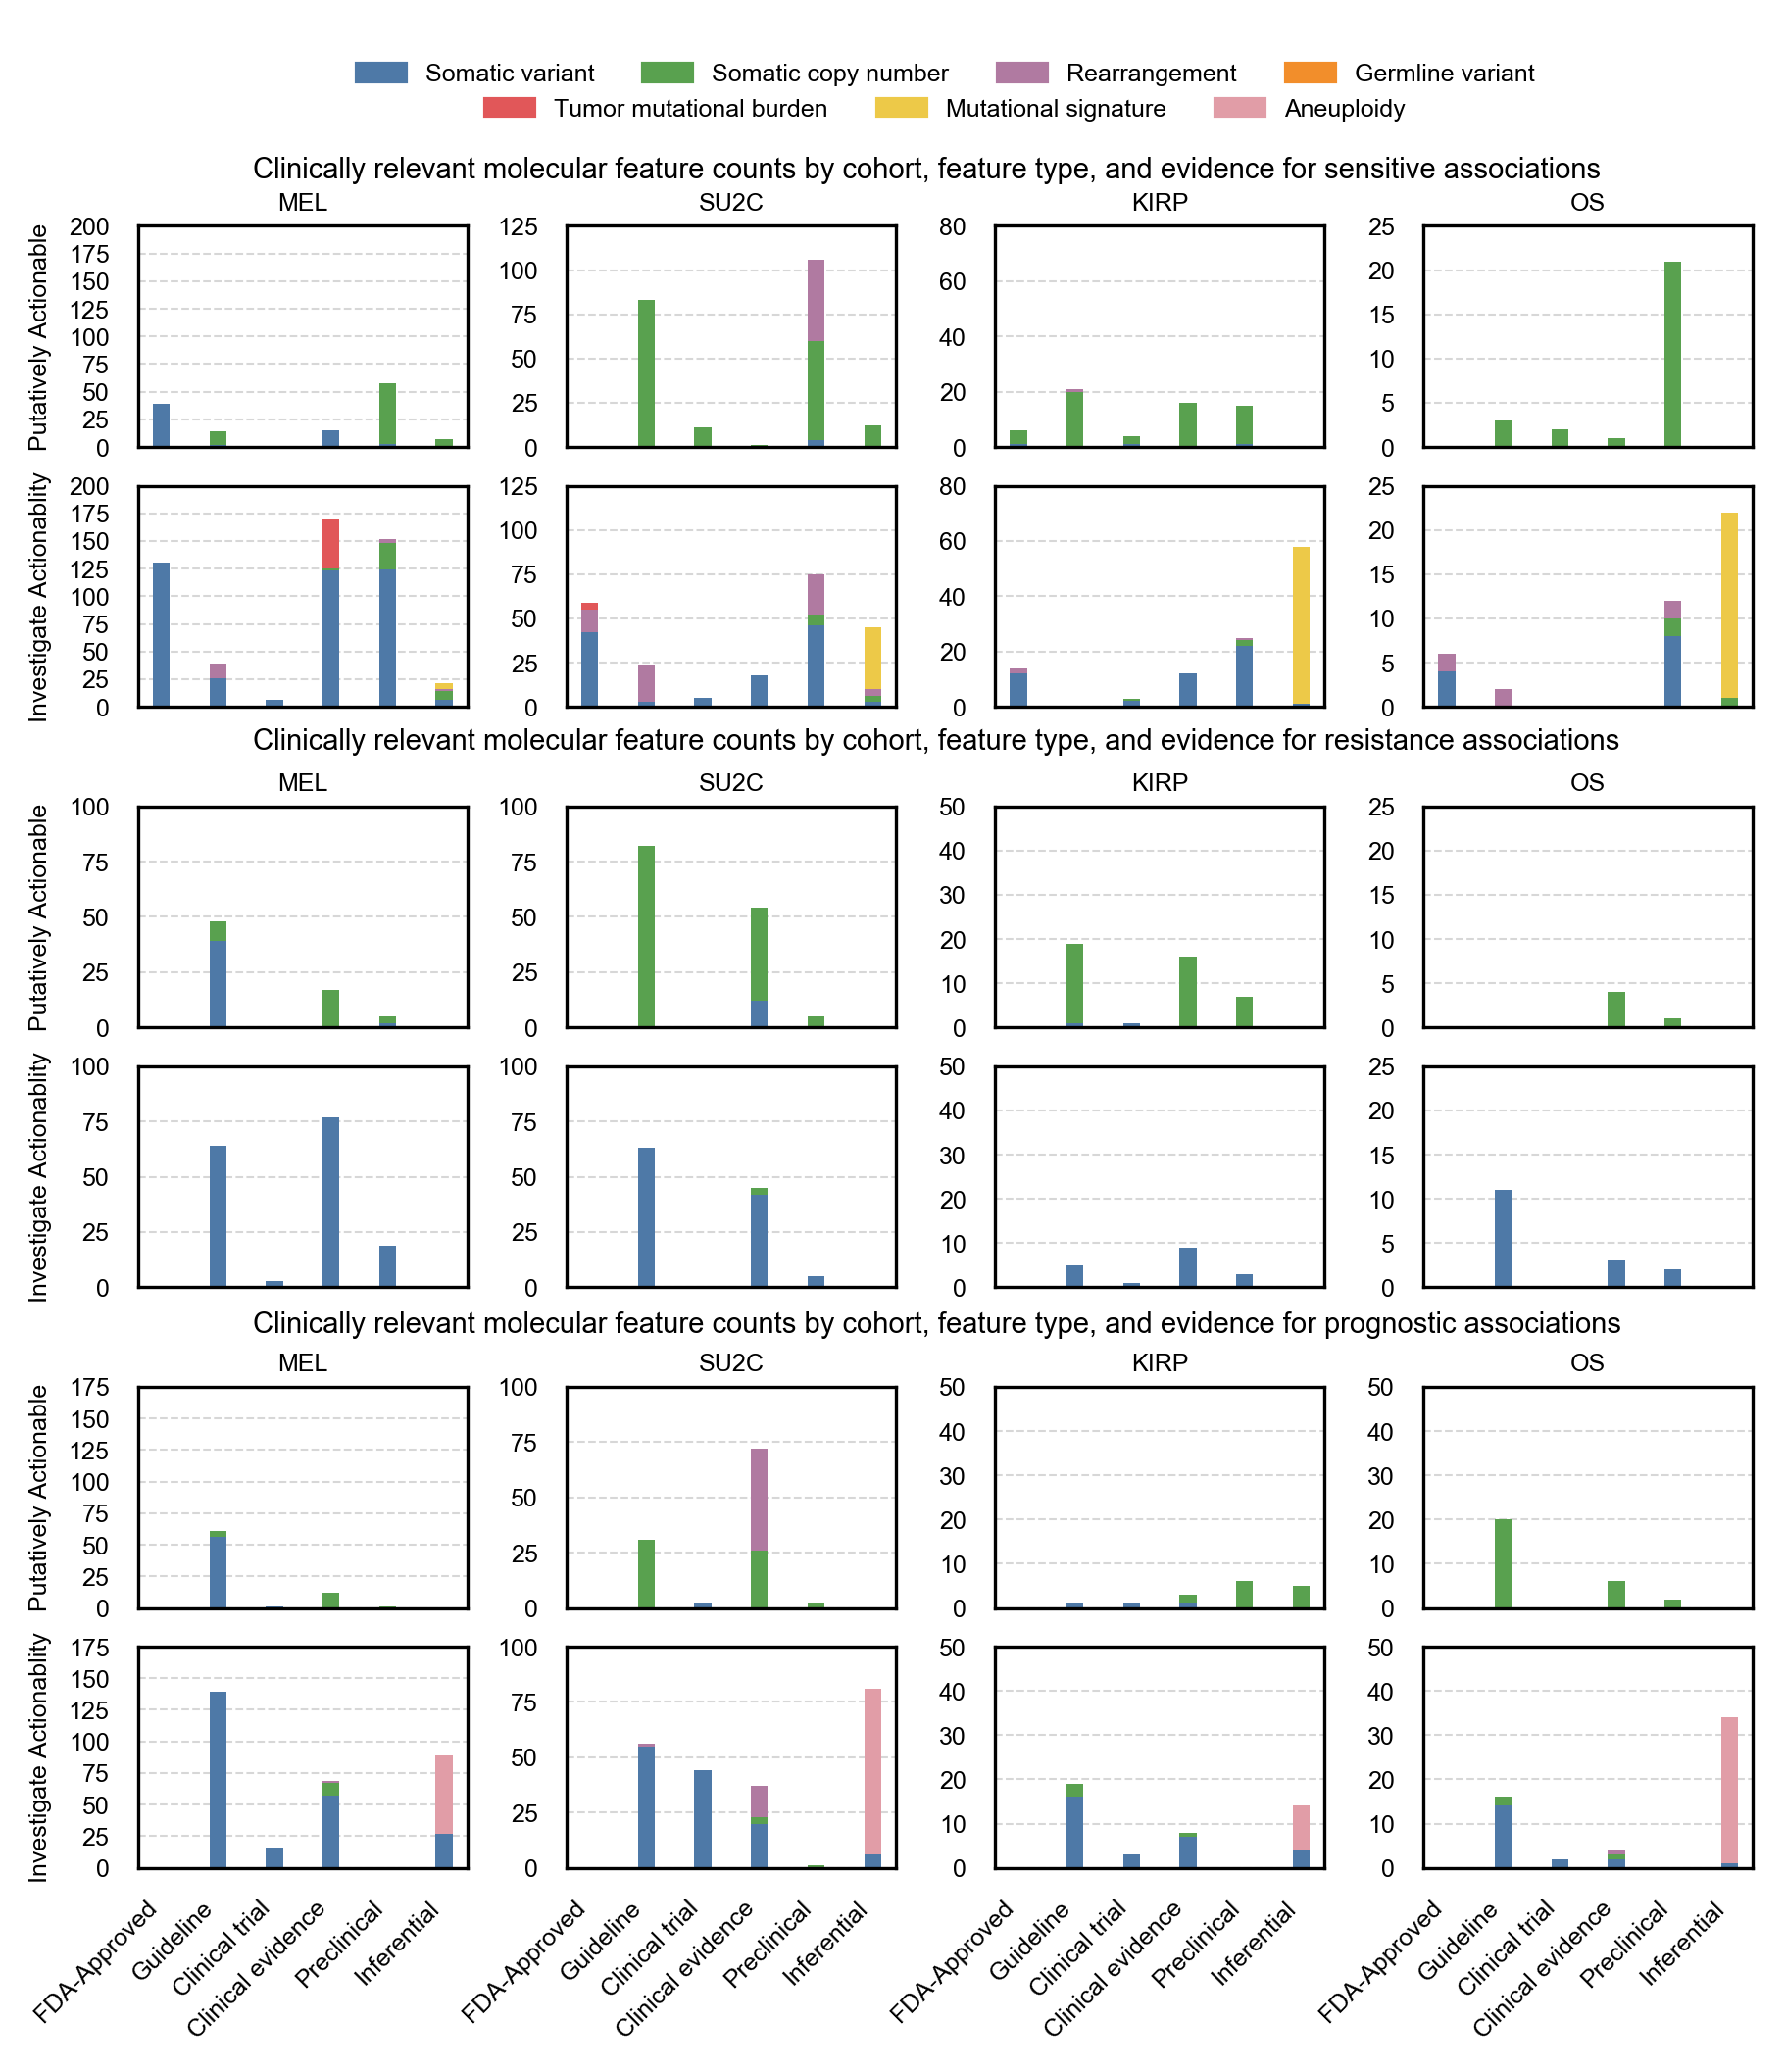

In [24]:
cm = 1/2.54
#fig = plt.figure(figsize=(7.5, 10))
fig = plt.figure(figsize=(18*cm, 21*cm), dpi=300)

width_ratios = [1, 0.3, 1, 0.3, 1, 0.3, 1]
height_ratios = [1, 0.75,
                 2, 0.35, 2, 
                 0.90, 
                 2, 0.35, 2,
                 0.90, 
                 2, 0.35, 2]
gs = gridspec.GridSpec(13, 7, width_ratios = width_ratios, height_ratios = height_ratios, hspace=0, wspace=0)

ax_legend = plt.subplot(gs[0, :])
patches = [mpatches.Patch(color=color, label=label) for label, color in feature_types.items()]
l1 = plt.legend(patches[:4], list(feature_types.keys())[:4], loc='lower center', frameon=False, fontsize=6, ncol=4)
plt.gca().add_artist(l1)
l2 = plt.legend(patches[4:], list(feature_types.keys())[4:], loc='upper center', frameon=False, fontsize=6, ncol=3)
l2.remove()
l1._legend_box._children.append(l2._legend_handle_box)
l1._legend_box.stale = True

remove_spines(ax_legend)
remove_ticks()

section_title_x = 0.18

assertion_type = 'sensitive'
section_title = f'Clinically relevant molecular feature counts by cohort, feature type, and evidence for {assertion_type} associations'
plt.figtext(section_title_x, 0.82, section_title, fontsize=7)
plot_row(2, 'Putatively Actionable', assertion_type)
plot_row(4, 'Investigate Actionability', assertion_type)

assertion_type = 'resistance'
section_title = f'Clinically relevant molecular feature counts by cohort, feature type, and evidence for {assertion_type} associations'
plt.figtext(section_title_x, 0.585, section_title, fontsize=7)
plot_row(6, 'Putatively Actionable', assertion_type)
plot_row(8, 'Investigate Actionability', assertion_type)

assertion_type = 'prognostic'
section_title = f'Clinically relevant molecular feature counts by cohort, feature type, and evidence for {assertion_type} associations'
plt.figtext(section_title_x, 0.345, section_title, fontsize=7)
plot_row(10, 'Putatively Actionable', assertion_type)
plot_row(12, 'Investigate Actionability', assertion_type)

filename = 'extended-data-fig-5'
folder = f'../../extended-data-figures/extended-data-fig-5'
!mkdir -p $folder
for suffix in ['eps', 'pdf', 'png', 'svg']:
    outname = f'{folder}/{filename}.{suffix}'
    plt.savefig(outname, format=suffix, bbox_inches='tight', dpi=300)

plt.show()

In [25]:
dataframe.to_excel(f'{folder}/source-data-{filename}.xlsx', index=False)